## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

    Data Description:
    Murder -- Muder rates in different places of United       States
    Assualt- Assualt rate in different places of United       States
    UrbanPop - urban population in different places of         United States
    Rape - Rape rate in different places of United States

## Heirarchical clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('crime_data (1).csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [4]:
df.head()

,City,Murder,Assault,Urbanpop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
# scale the numeric features of the dataset using minmax scaler.exclude the Univ feature
from  sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df.drop('City',axis=1))
df_scaled=pd.DataFrame(df_scaled,columns=df.columns[1:])
df_scaled.head()

,Murder,Assault,Urbanpop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [6]:
df_scaled.describe().round(3)

,Murder,Assault,Urbanpop,Rape
count,50.000,50.000,50.000,50.000
mean,0.421,0.431,0.568,0.360
std,0.262,0.285,0.245,0.242
min,0.000,0.000,0.000,0.000
25%,0.197,0.219,0.381,0.201
50%,0.389,0.390,0.576,0.331
75%,0.630,0.699,0.775,0.488
max,1.000,1.000,1.000,1.000


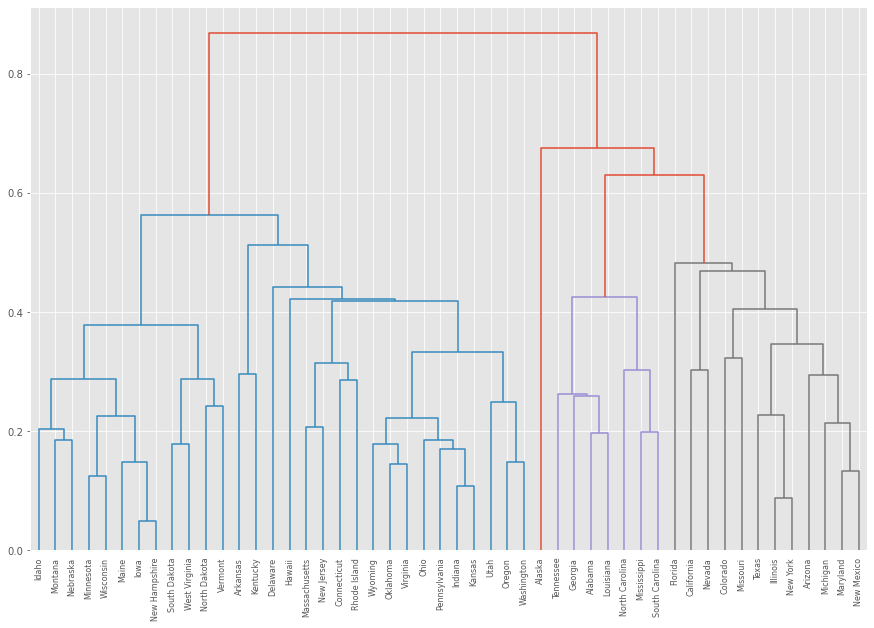

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(df_scaled,method='average')
plt.figure(figsize=(15,10))
dendrogram(link,labels=df['City'].values);

In [8]:
# clustering using agglomerative clustering from sklearn
from sklearn.cluster import AgglomerativeClustering
agglo=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [9]:
# get the cluster labels using fit_predict method of the agglo object
labels=agglo.fit_predict(df_scaled)
labels

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [10]:
df['cluster_labels']=labels
df.head()

,City,Murder,Assault,Urbanpop,Rape,cluster_labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


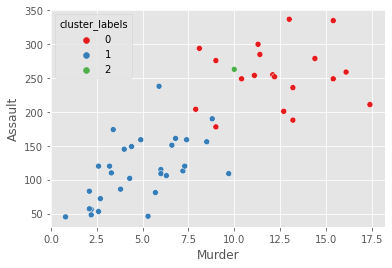

In [11]:
#scatter plot between sat score and acceptance rate ,hue=cluster_labels
sns.scatterplot(x='Murder',y='Assault',data=df, hue='cluster_labels',palette='Set1');

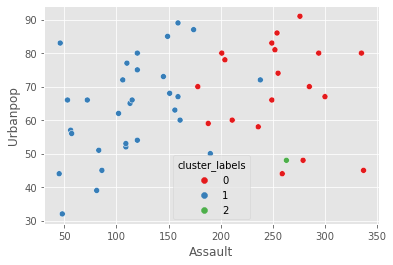

In [12]:
# scatter plot between graduation rate and hue=cluster labels
sns.scatterplot(x='Assault',y='Urbanpop',data=df, hue='cluster_labels',palette='Set1');

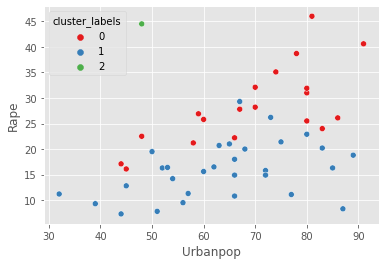

In [13]:
# scatter plot between graduation rate and hue=cluster labels
sns.scatterplot(x='Urbanpop',y='Rape',data=df, hue='cluster_labels',palette='Set1');

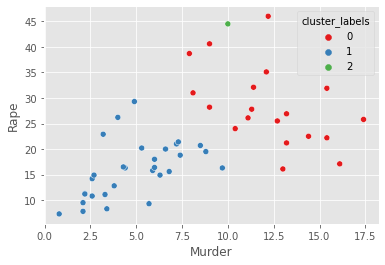

In [15]:
# scatter plot between graduation rate and hue=cluster labels
sns.scatterplot(x='Murder',y='Rape',data=df, hue='cluster_labels',palette='Set1');

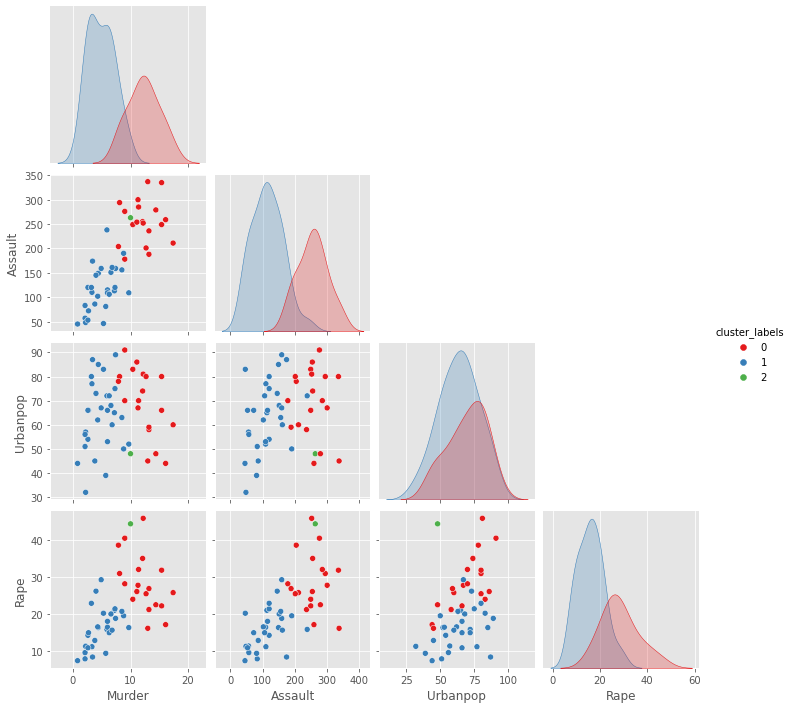

In [16]:
# plot the pairplot with hue based on cluster label
sns.pairplot(df,hue='cluster_labels',palette='Set1',corner=True);

In [17]:
# generate the cluster profiles
df.iloc[:,1:].groupby('cluster_labels').mean().round(2)

,Murder,Assault,Urbanpop,Rape
cluster_labels,,,,
0,12.28,254.84,69.47,28.36
1,4.87,114.43,63.63,15.94
2,10.00,263.00,48.00,44.50


## KMeans Clustering

In [18]:
# scale the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled__df=scaler.fit_transform(df.iloc[:,1:])
scaled__df=pd.DataFrame(scaled__df,columns=df.columns[1:])

In [20]:
from sklearn.cluster import KMeans
wss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled__df)
    wss.append(kmeans.inertia_)

C:\Users\bhale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
wss

[250.0,
 118.09247907890622,
 91.037938890743,
 69.41444395679592,
 53.01083735028644,
 44.177813752975325,
 40.54203249029638,
 35.54592960411398,
 31.278710020405402,
 28.74720562749205]

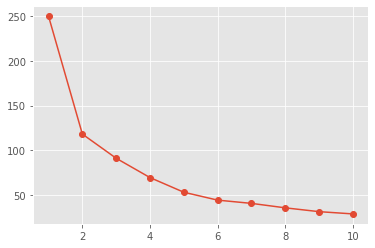

In [22]:
# plot the elbow curve
plt.plot(range(1,11),wss,marker='o');

In [23]:
km2=KMeans(n_clusters=2,random_state=42)
km2.fit(scaled__df)

KMeans(n_clusters=2, random_state=42)

In [24]:
labels=km2.labels_
labels

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [25]:
df['cluster_labels']=labels
df.head()

,City,Murder,Assault,Urbanpop,Rape,cluster_labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [26]:
# cluster profiles
df.iloc[:,1:].groupby('cluster_labels').mean()

,Murder,Assault,Urbanpop,Rape
cluster_labels,,,,
0,5.035484,119.225806,63.129032,16.864516
1,12.278947,254.842105,69.473684,28.357895


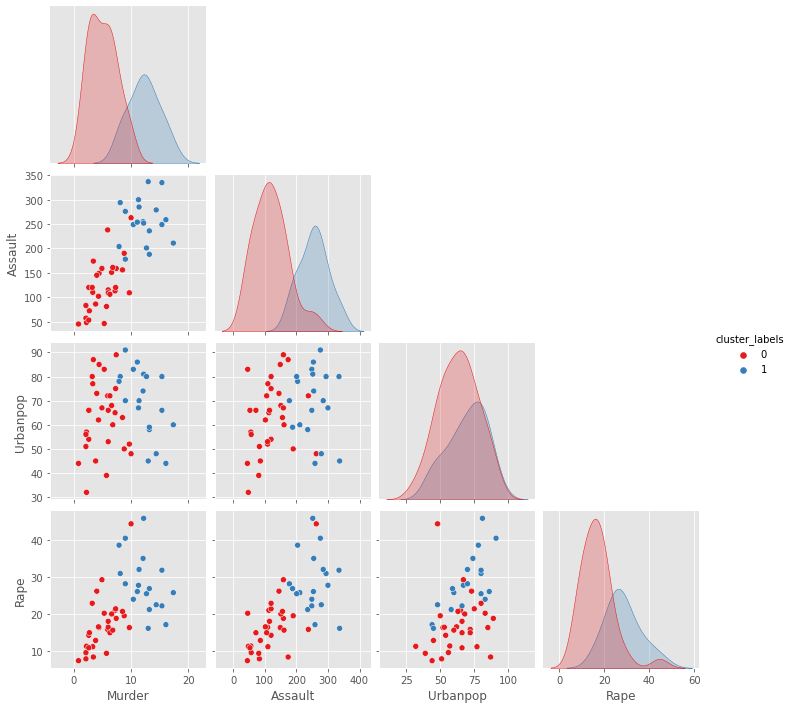

In [27]:
sns.pairplot(df,hue='cluster_labels',palette='Set1',corner=True)

In [28]:
# sihoette score for a set of cluster numbers
ss=[]
from sklearn.metrics import silhouette_score
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(scaled__df)
    ss.append(silhouette_score(scaled__df,km.labels_))

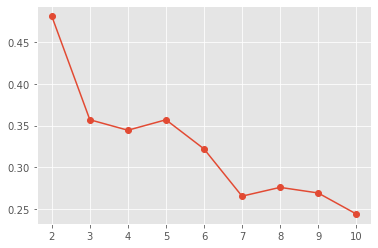

In [29]:
plt.plot(range(2,11),ss,marker='o')

## DBSCAN Clustering

In [30]:
df.describe().round(2)

,Murder,Assault,Urbanpop,Rape,cluster_labels
count,50.00,50.00,50.00,50.00,50.00
mean,7.79,170.76,65.54,21.23,0.38
std,4.36,83.34,14.47,9.37,0.49
min,0.80,45.00,32.00,7.30,0.00
25%,4.08,109.00,54.50,15.08,0.00
50%,7.25,159.00,66.00,20.10,0.00
75%,11.25,249.00,77.75,26.18,1.00
max,17.40,337.00,91.00,46.00,1.00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            50 non-null     object 
 1   Murder          50 non-null     float64
 2   Assault         50 non-null     int64  
 3   Urbanpop        50 non-null     int64  
 4   Rape            50 non-null     float64
 5   cluster_labels  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


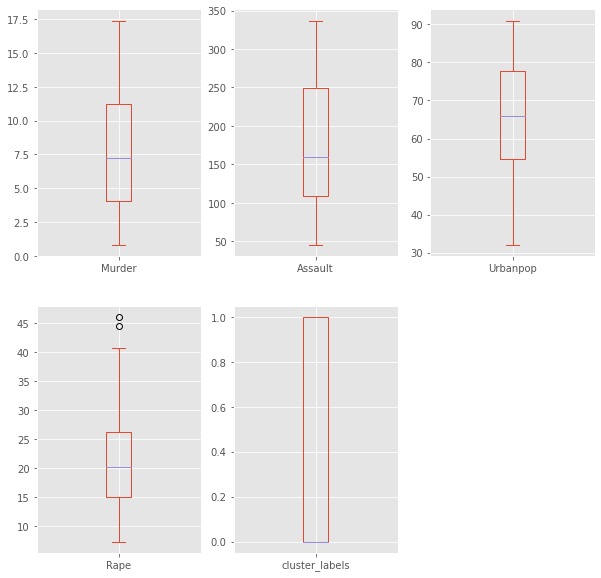

In [32]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,10));

In [47]:
df.head()

,Murder,Assault,Urbanpop,Rape,cluster_labels
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [48]:
dfscaled=scaler.fit_transform(df)
dfscaled=pd.DataFrame(dfscaled,columns=df.columns)
dfscaled

,Murder,Assault,Urbanpop,Rape,cluster_labels
0,1.255179,0.790787,-0.526195,-0.003451,1.277333
1,0.513019,1.118060,-1.224067,2.509424,-0.782881
2,0.072361,1.493817,1.009122,1.053466,1.277333
3,0.234708,0.233212,-1.084492,-0.186794,-0.782881
4,0.281093,1.275635,1.776781,2.088814,1.277333
5,0.025976,0.402909,0.869548,1.883901,1.277333
6,-1.040880,-0.736484,0.799761,-1.092723,-0.782881
7,-0.437875,0.815030,0.450825,-0.585834,-0.782881
8,1.765415,1.990786,1.009122,1.150530,1.277333
9,2.229265,0.487757,-0.386621,0.492653,1.277333


In [49]:
dfscaled.describe().round(2)

,Murder,Assault,Urbanpop,Rape,cluster_labels
count,50.00,50.00,50.00,50.00,50.00
mean,-0.00,0.00,-0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01
min,-1.62,-1.52,-2.34,-1.50,-0.78
25%,-0.86,-0.75,-0.77,-0.66,-0.78
50%,-0.12,-0.14,0.03,-0.12,-0.78
75%,0.80,0.95,0.85,0.53,1.28
max,2.23,2.02,1.78,2.67,1.28


In [51]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.4,min_samples=2) 

In [52]:
labels=dbscan.fit_predict(dfscaled)
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [53]:
# add the labels to the original dataset as a new feature
df['cluster_labels']=labels
df.head()

,Murder,Assault,Urbanpop,Rape,cluster_labels
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [54]:
df.groupby('cluster_labels').mean().round(2)

,Murder,Assault,Urbanpop,Rape
cluster_labels,,,,
-1,7.90,172.22,65.11,21.54
0,10.75,251.50,84.50,25.05
1,2.15,56.50,56.50,10.40


In [55]:
from sklearn.datasets import make_blobs,make_moons

In [68]:
x,y=make_moons(n_samples=100,shuffle=True,noise=0.05,random_state=1)

In [69]:
x_df=pd.DataFrame(x,columns=['x1','x2'])
x_df['y']=y

In [70]:
x_df.head()

,x1,x2,y
0,1.350769,-0.387705,1
1,1.620098,-0.326537,1
2,-0.483465,0.743868,0
3,1.341372,-0.344804,1
4,2.023108,0.174288,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

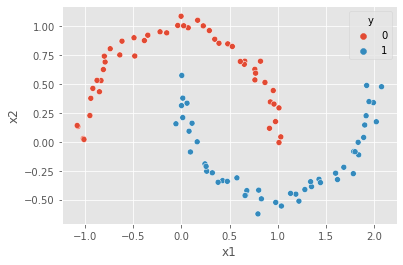

In [71]:
# scatter plot 
sns.scatterplot(x='x1',y='x2',hue='y',data=x_df)

In [72]:
# instantiate a dbscan model object with some value of eps and min samples and fit it to the data
dbscan_moons=DBSCAN(eps=0.2,min_samples=5)
labels_moon=dbscan_moons.fit_predict(x_df[['x1','x2']])
labels_moon

array([0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 3, 3, 3, 1, 1, 1, 0, 1, 1, 2,
       0, 2, 1, 1, 0, 1, 4, 1, 2, 0, 3, 0, 0, 1, 4, 2, 1, 1, 0, 3, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 3, 1, 1, 3, 4, 1, 0, 1, 0, 1, 2, 2, 1, 4, 0,
       1, 2, 1, 0, 3, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1], dtype=int64)

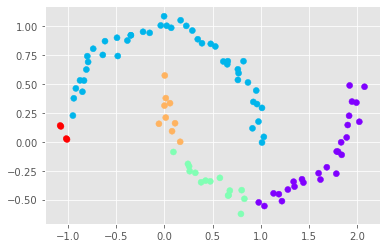

In [73]:
# plot the clusters with labels
plt.scatter(x_df['x1'],x_df['x2'],c=labels_moon,cmap='rainbow');

In [74]:
# take a set of epsilons and min_samples for experimentation,say 4 each
epsilon=[0.1,0.2,0.3,0.4]
samples=[2,3,4,5]

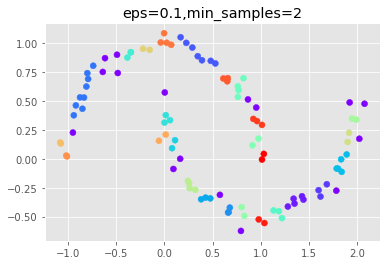

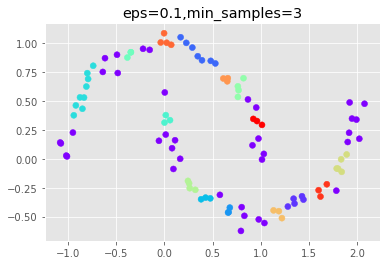

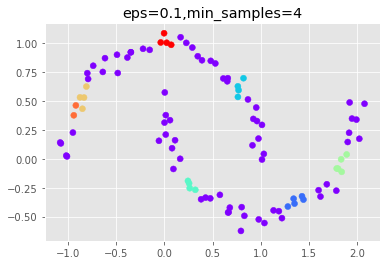

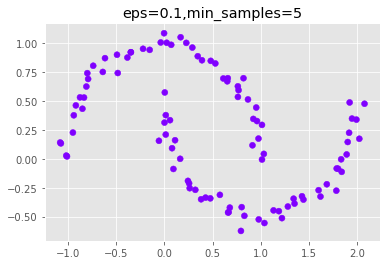

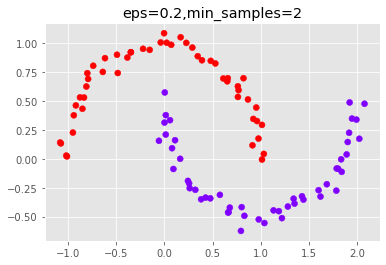

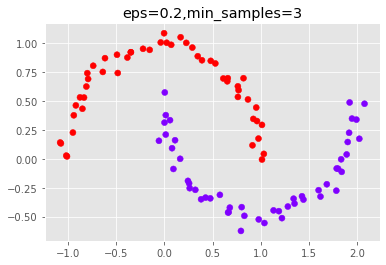

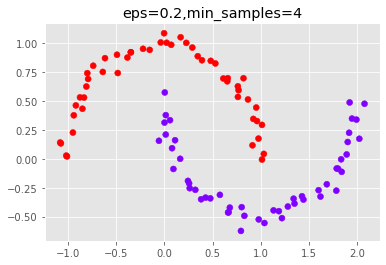

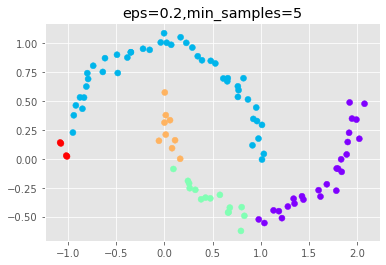

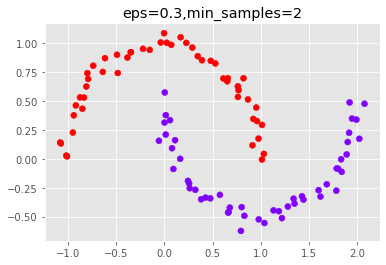

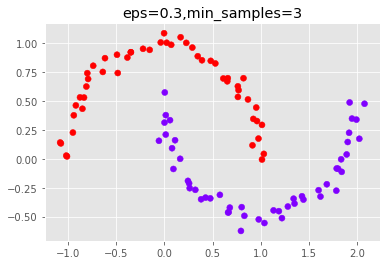

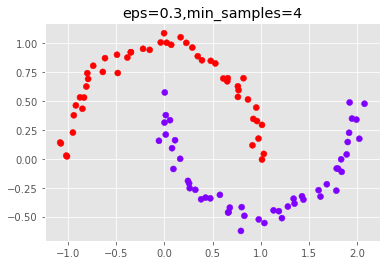

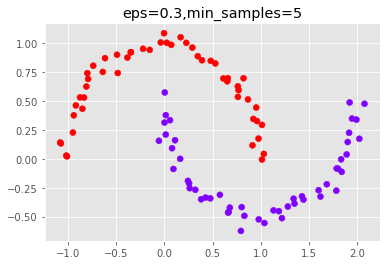

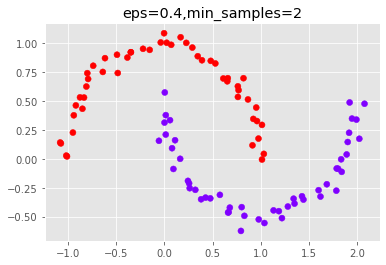

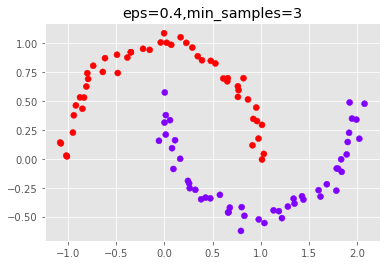

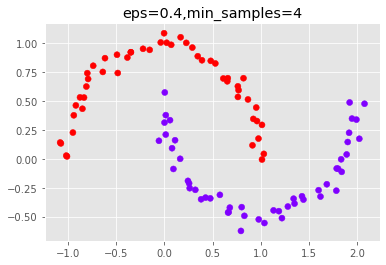

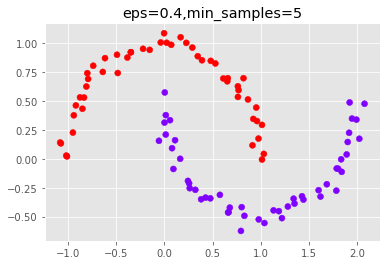

In [75]:
# create dbscan clustering for each combination of eps and min_samples and plot the clusters 
for e in epsilon:
    for s in samples:
        dbscan_moons=DBSCAN(eps=e,min_samples=s)
        labels_moon=dbscan_moons.fit_predict(x_df[['x1','x2']])
        plt.scatter(x_df['x1'],x_df['x2'],c=labels_moon,cmap='rainbow')
        plt.title('eps={},min_samples={}'.format(e,s))
        plt.show()

In [76]:
# create a dataset with 4 blobs
x,y=make_blobs(n_samples=1000,centers=4,n_features=2,cluster_std=1.0,center_box=(-10.0,10.0),shuffle=True,random_state=1)

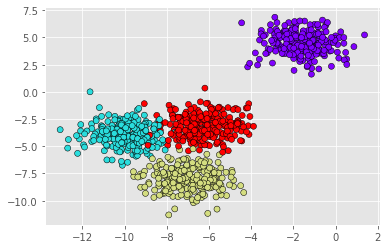

In [77]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow',edgecolors='k');

In [78]:
from sklearn.metrics import silhouette_score
sil_score=[]
eps_sample_combo=[]
for e in epsilon:
    for s in samples:
        dbscan_blobs=DBSCAN(eps=e,min_samples=s)
        labels_blobs=dbscan_blobs.fit_predict(x)
        sil_score.append(silhouette_score(x,labels_blobs))
        eps_sample_combo.append((f'{e}-{s}'))

In [79]:
sil_score

[-0.2644079034730595,
 -0.5890090963673951,
 -0.7227756444493889,
 -0.6324651984947888,
 -0.08244416078736343,
 -0.19532246376877055,
 -0.2168894360678409,
 -0.32693948431994846,
 -0.2724995328286032,
 -0.260369666539224,
 -0.05702717281116049,
 -0.04292208282321961,
 -0.2149342404330444,
 -0.17851335796392653,
 -0.07609342805936214,
 0.23420271957179598]

In [80]:
eps_sample_combo

['0.1-2',
 '0.1-3',
 '0.1-4',
 '0.1-5',
 '0.2-2',
 '0.2-3',
 '0.2-4',
 '0.2-5',
 '0.3-2',
 '0.3-3',
 '0.3-4',
 '0.3-5',
 '0.4-2',
 '0.4-3',
 '0.4-4',
 '0.4-5']

Text(0.5, 1.0, 'Silhoette score vs eps and min_samples')

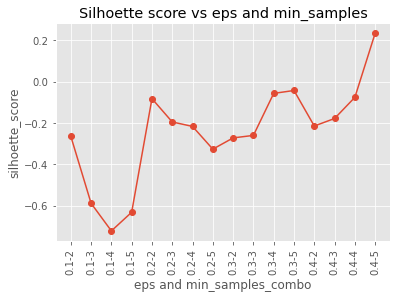

In [81]:
# plot the line plot of silhoutte score vs eps and min_samples
plt.plot(eps_sample_combo,sil_score,marker='o')
plt.xticks(rotation=90)
plt.xlabel('eps and min_samples_combo')
plt.ylabel('silhoette_score')
plt.title('Silhoette score vs eps and min_samples')

In [82]:
# use the best combination of eps and min_samples epsilon=0.4 and samples = 5
dbscan_0_4_5=DBSCAN(eps=0.4,min_samples=5)
labels_blobs=dbscan_0_4_5.fit_predict(x)
labels_blobs

array([ 0,  1,  2,  3,  1,  3,  3,  3,  2,  0,  0,  3,  2,  2, -1,  3,  3,
        0,  3,  1,  0,  3,  0,  2,  0,  3,  1, -1,  2, -1,  1,  1,  1,  1,
        2,  2,  2,  2,  0,  0, -1,  2,  0,  3,  1,  1,  3,  4,  1,  1,  2,
       -1,  3,  0, -1,  3,  3,  0,  1,  2,  1,  1,  3, -1,  0,  2,  2,  2,
        2,  1,  3,  1,  3,  3,  1,  2,  3, -1,  2,  3,  1,  1,  0,  2,  2,
        0,  2,  1,  2,  3,  1, -1,  3,  2,  3,  3,  2,  0,  3,  0,  3,  1,
        2,  3,  0,  3,  0,  3,  3,  2,  3,  3,  0,  2,  1,  3,  2,  3,  0,
        0,  3, -1,  3,  3, -1, -1,  2,  1,  2,  2,  2,  0,  2, -1,  5,  3,
       -1, -1,  1,  3,  1,  0,  3,  3, -1,  2,  3,  0,  0,  1,  0, -1,  1,
        2,  0,  3,  0,  0, -1,  1,  1,  3, -1, -1,  0,  0, -1, -1, -1,  3,
        0,  0,  1,  1,  0,  0,  3,  3,  1,  1,  0,  1,  3,  0,  1,  2,  1,
        3, -1,  2,  2,  1,  3,  1,  3, -1,  0,  0,  2,  3,  3,  1,  1,  0,
        3,  3,  0,  2,  0,  2,  3,  2,  6, -1,  1, -1, -1,  2, -1, -1,  3,
        1,  1,  3,  2,  1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


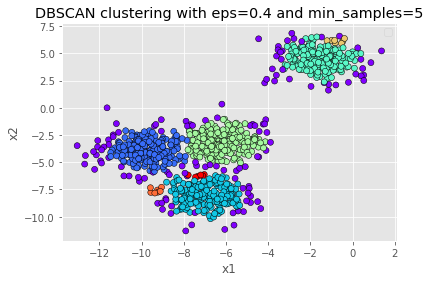

In [83]:
# plot the clusters
plt.scatter(x[:,0],x[:,1],c=labels_blobs,cmap='rainbow',edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('DBSCAN clustering with eps=0.4 and min_samples=5')
plt.legend();

## Conclusion
    1 - Analysing Murder and Assault variables shows a       clearer connection between them. Higher the murder       rates in a city higer the assaults and vice versa

    2 = Contrary to murders and assaults, there is much     more spread among the clusters when comparing           murders and rapes. Some correlation is visible, but     low murder rates in a city seem to indicate lower       number of rapes and vice versa

    3 - As with murder and assault, also rates of rape       and assault show clearer correlations